In [1]:
# This code for figure 11 - surface current, eke
# edited by EunByeol Cho 
# July 4 2024

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
#import pystuff as ps
import cartopy.crs as ccrs
import cartopy.feature as cf
import seaborn as sns
import matplotlib.patches as patches
from scipy import stats
import cmocean
import glob
from cmcrameri import cm
from tqdm.notebook import tqdm_notebook

In [6]:
import warnings
warnings.simplefilter(action='ignore')

In [7]:
# load variables at each periods 
eke_2000 = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure11/eke.2002_2012.nc')['u1-31']
speed_2000 = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure11/speed.2002_2012.nc')['u1-31']

eke_scaling = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure11/eke_scaling.nc')['eke_scaling']
speed_scaling = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure11/speed_scaling.nc')['speed_scaling']

In [8]:
eke_2000 = eke_2000.squeeze()
speed_2000 = speed_2000.squeeze()

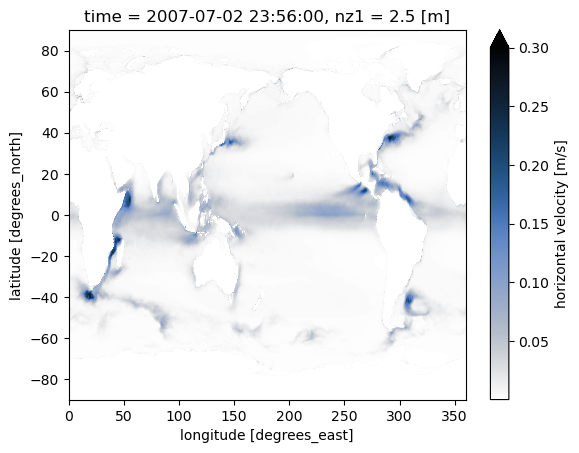

In [9]:
eke_2000.plot(cmap=cm.oslo_r, vmax=0.3)

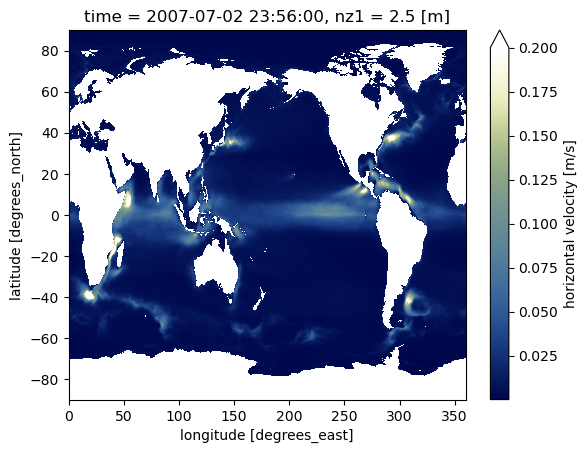

In [10]:
eke_2000.plot(cmap=cm.davos,vmax=0.2)

  0%|          | 0/4 [00:00<?, ?it/s]

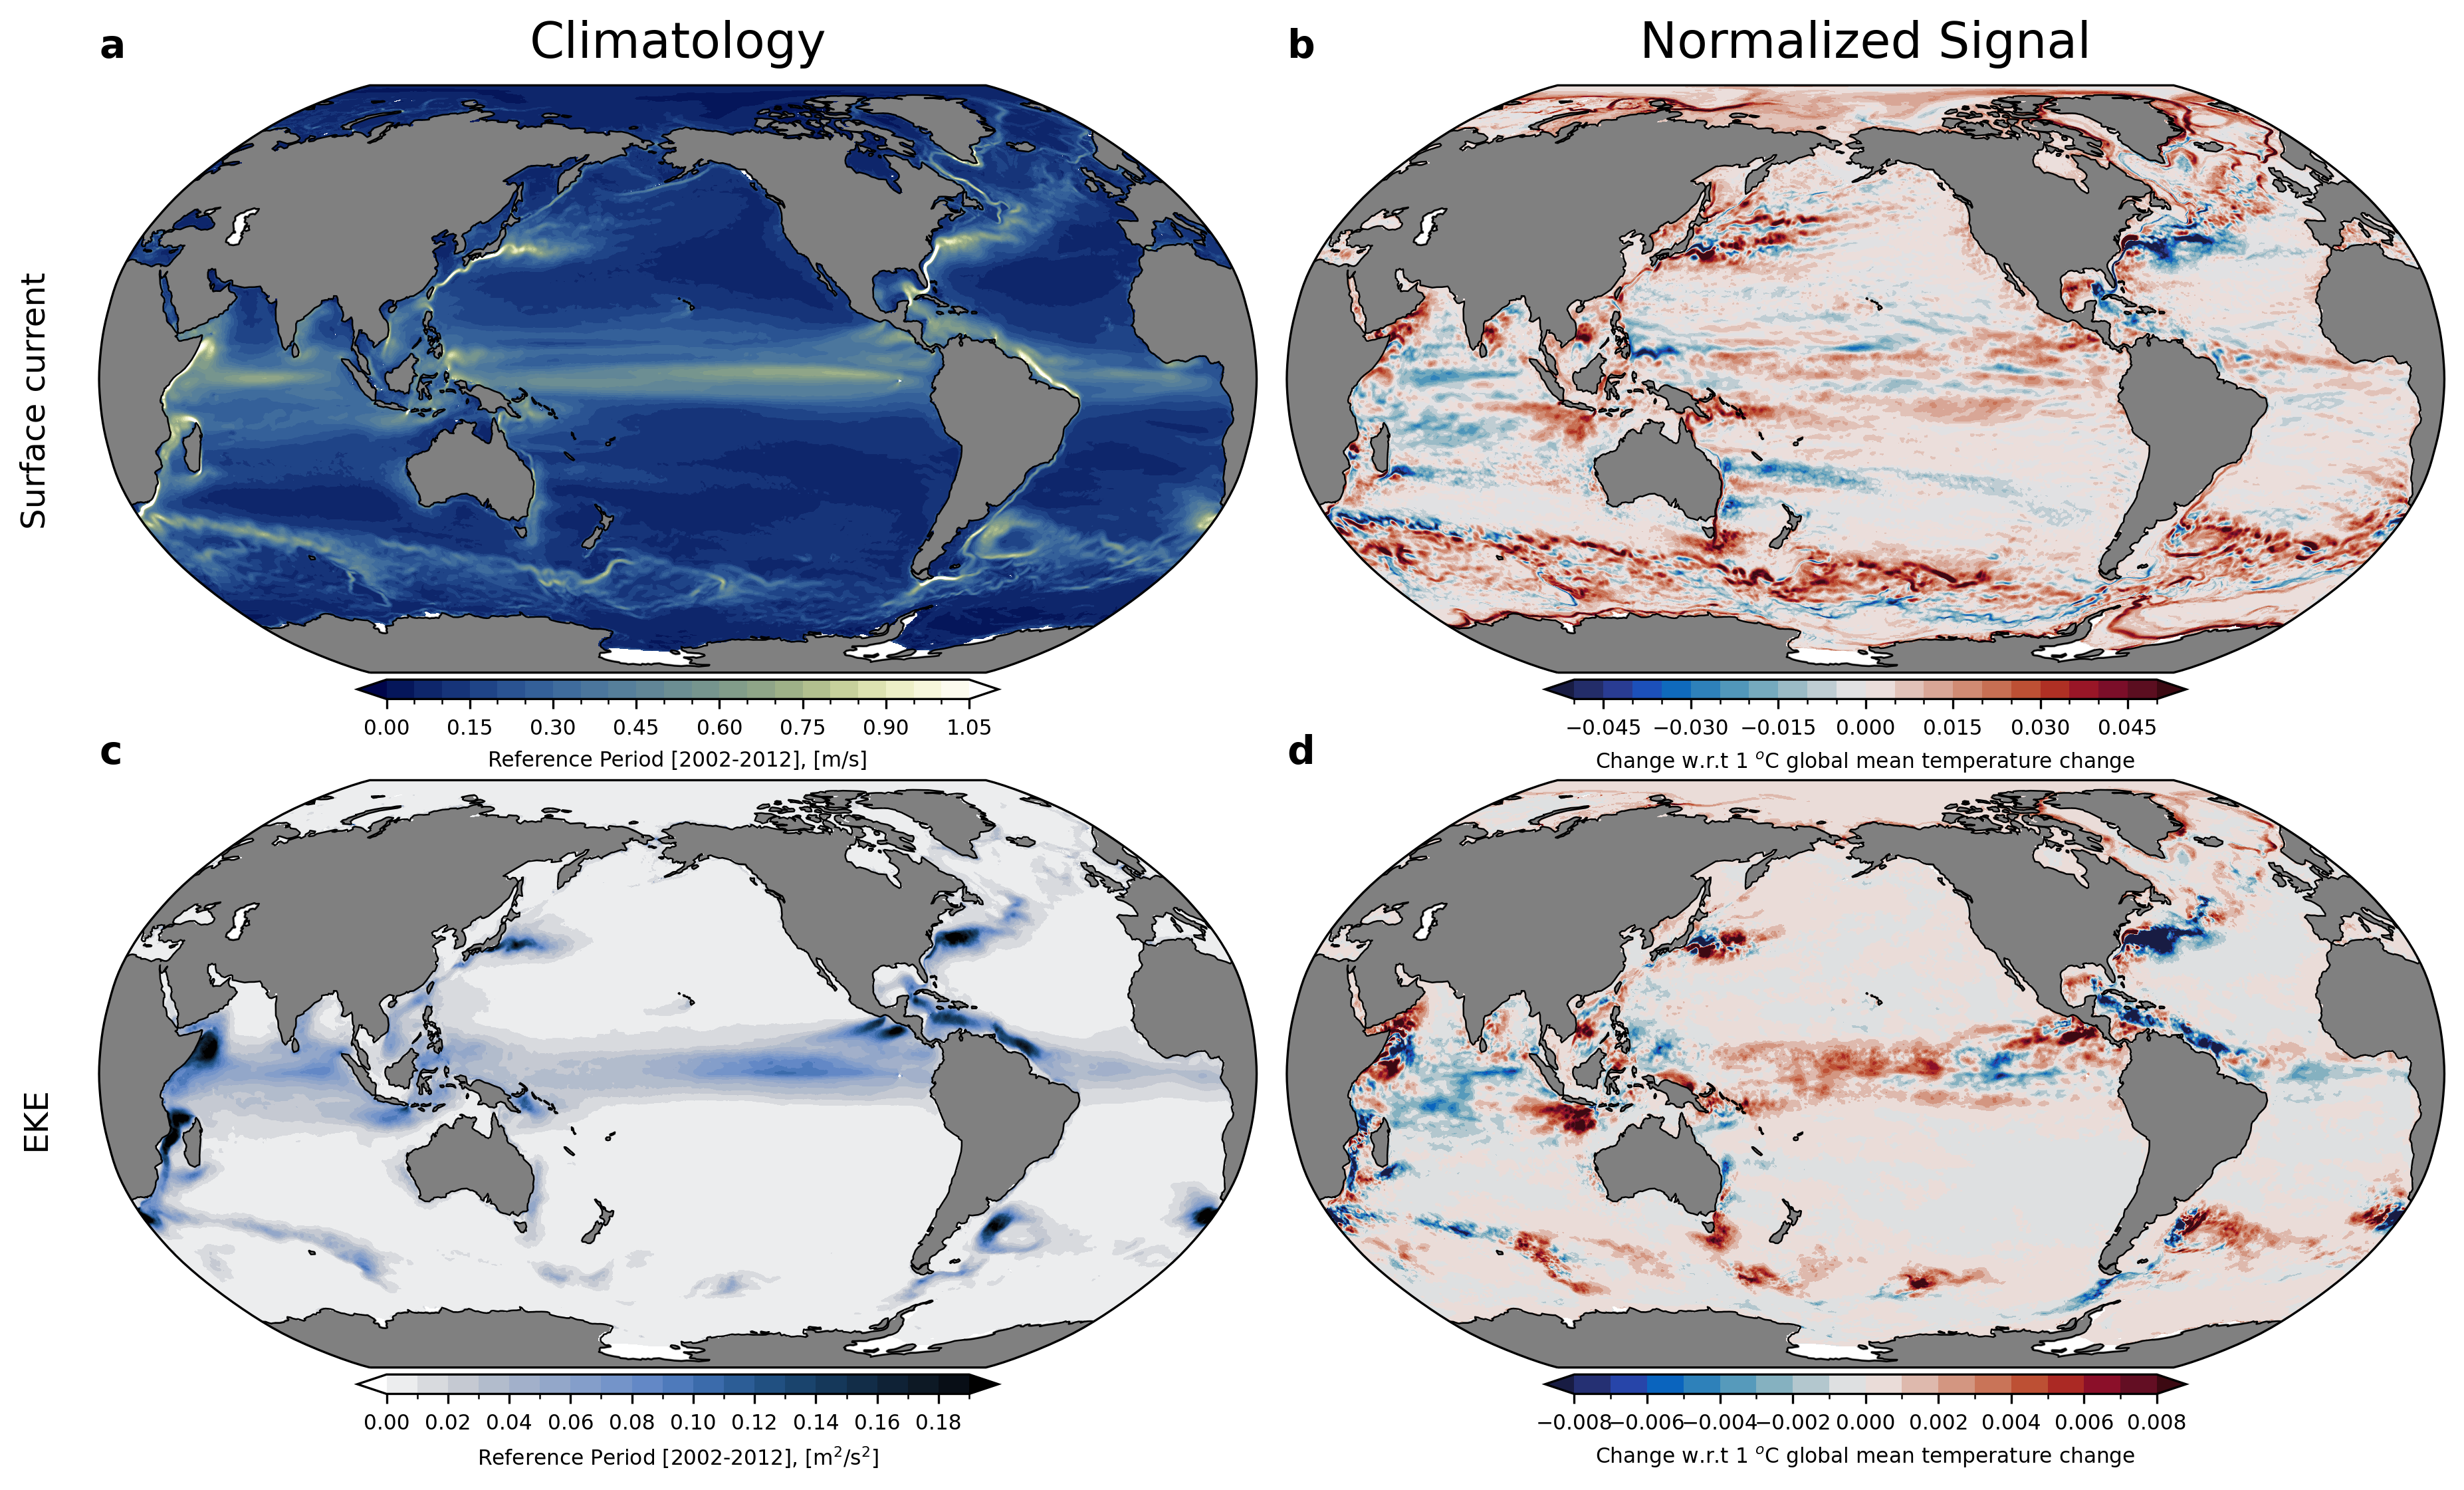

In [11]:
plt.rcParams.update({'font.size': 7.5})
fig,ax = plt.subplots(2,2,figsize=(18.5, 12), dpi=300, facecolor='w', edgecolor='k',subplot_kw={'projection': ccrs.Robinson(central_longitude=200)})

import cmocean

titlesM = ['Climatology', 'Normalized Signal']
titlesL = ['$\mathbf{a}$', '$\mathbf{b}$', '$\mathbf{c}$', '$\mathbf{d}$']
labels = ['Surface current', 'EKE' ]

fields=[speed_2000, speed_scaling,
        eke_2000, eke_scaling]

levels=[np.arange(0,1.1,0.05), np.arange(-0.05,0.055,0.005),
        np.arange(0,0.2,0.01), np.arange(-0.008,0.0081,0.001)]

# cbar=[cm.oslo_r, cm.vik,
#       cm.oslo_r, cm.vik]

cbar=[cm.davos, cmocean.cm.balance,
      cm.oslo_r, cmocean.cm.balance]

units=[ 'Reference Period [2002-2012], [m/s]', 'Change w.r.t 1 $^{o}$C global mean temperature change',
        'Reference Period [2002-2012], [m$^{2}$/s$^{2}$]', 'Change w.r.t 1 $^{o}$C global mean temperature change']

for i,a in enumerate(tqdm_notebook(ax.flat)) :
      clabel=('%s'%units[i])
      cbar_kwargs={'orientation':'horizontal','pad':0.01,'shrink':0.55, 'label':clabel, 'aspect':33}
      fields[i].plot.contourf(ax=a,transform=ccrs.PlateCarree(),levels=levels[i],cbar_kwargs=cbar_kwargs,cmap=cbar[i], extend='both')

      a.add_feature(cf.LAND,color='grey')
      a.coastlines(linewidth=0.6,color='black')
      a.set_global()  

for i, label in enumerate(labels):
    # fig.text(0.29, 0.85 - i * 0.19, label, transform=fig.transFigure, fontsize=12, va='center', ha='center', rotation=90)
    fig.text(0.29, 0.82 - i * 0.3, label, transform=fig.transFigure, fontsize=12, va='center', ha='center', rotation=90)
         
for i, a in enumerate(ax.flat):
    a.set_title('%s' % titlesL[i], size=14, loc='left')

    if i <= 1:
        a.set_title('%s' % (titlesM[i]), size=18, y=1.0, pad=10)
    else:
        a.set_title('')
            
plt.tight_layout(rect=[0.3, 0.36, 0.95, 0.97])
plt.savefig('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure11/Figure11.png',dpi=500, bbox_inches = 'tight')